<a href="https://colab.research.google.com/github/EPEREZ232/Alura-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


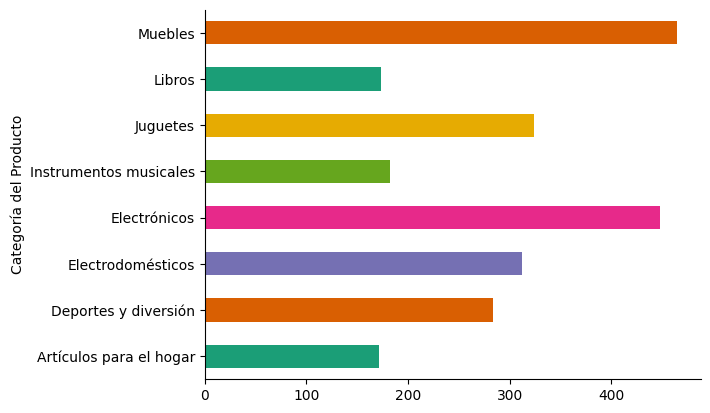

In [63]:
# @title Categoría del Producto

from matplotlib import pyplot as plt
import seaborn as sns
tienda.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



In [88]:
import pandas as pd

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda'])

todas_las_tiendas.head()
todas_las_tiendas['Facturación Total'] = todas_las_tiendas['Precio'] + todas_las_tiendas['Costo de envío']

facturacion_por_tienda_producto = todas_las_tiendas.groupby(['Tienda', 'Producto'])['Facturación Total'].sum()

print("Análisis de facturación por tienda y producto:")
print(facturacion_por_tienda_producto)


facturacion_por_tienda = todas_las_tiendas.groupby('Tienda')['Facturación Total'].sum()
print("\nFacturación total por tienda:")
print(facturacion_por_tienda)


facturacion_por_producto = todas_las_tiendas.groupby('Producto')['Facturación Total'].sum()
print("\nFacturación total por producto (todas las tiendas):")
print(facturacion_por_producto)

facturacion_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Facturación Total'].mean()
print("\nFacturación promedio por tienda:")
print(facturacion_promedio_por_tienda)

Análisis de facturación por tienda y producto:
Tienda    Producto                 
Tienda 1  Ajedrez de madera             1513500.0
          Armario                      31026400.0
          Asistente virtual             8482800.0
          Auriculares                   5328400.0
          Auriculares con micrófono     5002100.0
                                          ...    
Tienda 4  Smartwatch                    7153600.0
          Sofá reclinable              33784900.0
          TV LED UHD 4K                95090600.0
          Tablet ABXY                  59775000.0
          Vaso térmico                  2251300.0
Name: Facturación Total, Length: 204, dtype: float64

Facturación total por tienda:
Tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: Facturación Total, dtype: float64

Facturación total por producto (todas las tiendas):
Producto
Ajedrez de madera                5424500.0
Armario                        

In [81]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda.columns = tienda.columns.str.strip()
tienda2.columns = tienda2.columns.str.strip()
tienda3.columns = tienda3.columns.str.strip()
tienda4.columns = tienda4.columns.str.strip()


todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda'])

todas_las_tiendas['Facturación Total'] = todas_las_tiendas['Precio'] + todas_las_tiendas['Costo de envío']

facturacion_por_tienda_producto = todas_las_tiendas.groupby(['Tienda', 'Producto'])['Facturación Total'].sum()

facturacion_por_tienda_producto = facturacion_por_tienda_producto.reset_index()

facturacion_por_tienda_producto.columns = ['Tienda', 'Producto', 'Facturación Total']


print(facturacion_por_tienda_producto.to_string())

       Tienda                     Producto  Facturación Total
0    Tienda 1            Ajedrez de madera          1513500.0
1    Tienda 1                      Armario         31026400.0
2    Tienda 1            Asistente virtual          8482800.0
3    Tienda 1                  Auriculares          5328400.0
4    Tienda 1    Auriculares con micrófono          5002100.0
5    Tienda 1          Balón de baloncesto          2890600.0
6    Tienda 1            Balón de voleibol          2214700.0
7    Tienda 1                      Batería         39705600.0
8    Tienda 1                    Bicicleta         28893300.0
9    Tienda 1      Bloques de construcción          1957800.0
10   Tienda 1                     Cama box         23250900.0
11   Tienda 1                    Cama king         32843500.0
12   Tienda 1    Carrito de control remoto          3951900.0
13   Tienda 1                 Celular ABXY         34398500.0
14   Tienda 1  Ciencia de datos con Python          2169100.0
15   Tie

In [90]:
import pandas as pd


todas_las_tiendas['Facturación Total'] = todas_las_tiendas['Precio'] + todas_las_tiendas['Costo de envío']

todas_las_tiendas['Ganancia'] = todas_las_tiendas['Precio'] - todas_las_tiendas['Costo de envío']

todas_las_tiendas['Ganancia'] = todas_las_tiendas['Ganancia'].round(2)

todas_las_tiendas['Ganancia'] = todas_las_tiendas['Ganancia'].astype(int)
ganancia_y_costo_por_tienda = todas_las_tiendas.groupby('Tienda').agg({'Ganancia': 'sum', 'Costo de envío': 'sum'})


ganancia_y_costo_por_tienda['Rentabilidad'] = ganancia_y_costo_por_tienda['Ganancia'] / ganancia_y_costo_por_tienda['Costo de envío']

print("Rentabilidad por tienda:")
print(ganancia_y_costo_por_tienda.to_string())

tienda_mas_rentable = ganancia_y_costo_por_tienda['Rentabilidad'].idxmax()
print("\nLa tienda más rentable es:", tienda_mas_rentable)

Rentabilidad por tienda:
            Ganancia  Costo de envío  Rentabilidad
Tienda                                            
Tienda 1  1089502500      61377900.0     17.750729
Tienda 2  1056858400      59485100.0     17.766775
Tienda 3  1039503000      58516600.0     17.764241
Tienda 4   983058300      55317400.0     17.771231

La tienda más rentable es: Tienda 4


# 2. Ventas por categoría

In [77]:

ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()


print("Ventas por categoría (incluyendo costo de envío):")
print(ventas_por_categoria)

Ventas por categoría (incluyendo costo de envío):
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64


# 3. Calificación promedio de la tienda


In [76]:
calificacion_promedio_por_categoria = tienda.groupby('Categoría del Producto')['Calificación'].mean()
print(calificacion_promedio_por_categoria)

Categoría del Producto
Artículos para el hogar    3.748538
Deportes y diversión       3.897887
Electrodomésticos          4.032051
Electrónicos               4.004464
Instrumentos musicales     4.049451
Juguetes                   4.077160
Libros                     3.976879
Muebles                    3.946237
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [74]:
productos_menos_vendidos = tienda.groupby('Categoría del Producto').size().sort_values(ascending=True)
print(productos_menos_vendidos)

Categoría del Producto
Artículos para el hogar    171
Libros                     173
Instrumentos musicales     182
Deportes y diversión       284
Electrodomésticos          312
Juguetes                   324
Electrónicos               448
Muebles                    465
dtype: int64


In [75]:
productos_más_vendidos= tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
print(productos_más_vendidos)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64


# 5. Envío promedio por tienda

In [87]:
import pandas as pd

envio_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Costo de envío'].mean()

print("Envío promedio por tienda:")
print(envio_promedio_por_tienda.to_string())

Envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167


***Informe*** *texto en cursiva*

De acuerdo a los datos analizados la tienda más rentable es la 4 ya que si bien presenta menos venta a comparación con la tienda 1 que posee mayor cantidad de ventas la situación a tener en cuenta que los gastos de envio son los que están perjudicando la rentabilidad